Fenchel-Rockafellar Duality
===========================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_matlab/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$


In [1]:
source("../../nt_toolbox/general.R")
source("../../nt_toolbox/signal.R")
library(pracma)

Loading required package: plyr
Loading required package: magrittr

Attaching package: ‘imager’

The following object is masked from ‘package:magrittr’:

    add

The following object is masked from ‘package:plyr’:

    liply

The following objects are masked from ‘package:stats’:

    convolve, spectrum

The following object is masked from ‘package:graphics’:

    frame

The following object is masked from ‘package:base’:

    save.image


Attaching package: ‘pracma’

The following object is masked _by_ ‘.GlobalEnv’:

    grad

The following objects are masked from ‘package:magrittr’:

    and, mod, or



This numerical tour is an introduction to convex duality with an
application to total variation denoising.

Convex Duality
--------------
Given some convex, proper, and lower semi-continuous function $f(x)$ defined for $x \in \RR^N$, its
Legendre-Fenchel dual function is defined as
$$ \forall u \in \RR^N, \quad f^*(u) = \umax{x \in \RR^N} \dotp{x}{u} - f(x). $$


One can show that $f^*$ is a convex function, and that it satisfies
$(f^*)^* = f$.


One can show if $f(x) = \frac{1}{2} \norm{A x - b}^2$ where $A \in \RR^{N \times N}$
is an invertible matrix, then
$$f^*(u) = \frac{1}{2} \norm{\tilde A u + b}^2
\qwhereq \tilde A = (A^*)^{-1}. $$


One can show that in the case of $\ell^p$ norms
$$ f(x) = \norm{x}_p = \pa{ \sum_{i=1}^N \abs{x_i}^p }^{1/p} $$
with the usual extension to $p=+\infty$
$$ \norm{x}_\infty = \umax{1 \leq i \leq N} \abs{x_i}$$
then one has
$$ f^*(u) = \iota_{\norm{\cdot}_q \leq 1}
 \qwhereq \frac{1}{p}+\frac{1}{q}=1, $$
where $\iota_{\Cc}$ is the indicator function of the convex set
$\Cc$.

FB on the Fenchel-Rockafellar Dual Problem
------------------------------------------
We are concerned with the minimization of composite problems of the form
$$ \umin{x \in \RR^N} f(x) + g(A(x)) $$
where $ A \in \RR^{P \times N} $ is a linear map (a matrix),
 $f : \RR^N \rightarrow \RR $
and $g : \RR^P \rightarrow \RR $
are convex functional.


We now assume that $f$ is a $L$-strongly convex function.
In this case, one can show that $f^*$ is a $C^1$ smooth function, and
that its gradient is $L$-Lipschitz.


In this case, the Fenchel-Rockafellar theorem shows that one can solve
the following dual problem
$$ \umin{x \in \RR^N} f(x) + g(A(x)) =
  - \umin{u \in \RR^P} f^*( -A^* u ) + g^*(u) $$
and recover the unique solution $x^\star$
of the primal problem from a (non-necessarily unique) solution $u^\star$
to the dual problem as
$$ x^\star = \nabla f^*( -A^* u^\star ). $$


Denoting $F(u) = f^*( -A^* u )$ and $G(u) = g^*(u)$, one thus needs
to solve the problem
$$ \umin{u \in \RR^P} F(u) + G(u). $$


We assume that the function $g$ is simple, in the sense that
one can compute in closed form
the so-called proximal mapping, which is defined as
$$ \text{prox}_{\ga g}(x) = \uargmin{z \in \RR^N} \frac{1}{2}\norm{x-z}^2 + \ga g(z). $$
for any $\ga > 0$.


Note that $g$ being simple is equivalent to $g^*$ also being simple
because of
Moreau's identity:
$$ x = \text{prox}_{\tau g^*}(x) + \tau \text{prox}_{g/\tau}(x/\tau). $$


Since $F$ is smooth and $G$ is simple, one can apply the
Foward-Backward algorithm, which reads,
after initializing $u^{(0)} \in \RR^P$,
$$ u^{(\ell+1)} = \text{prox}_{\ga G}\pa{ u^{(\ell)} - \ga \nabla F( u^{(\ell)} )  }. $$
with $\ga < 2/L$.


The primal iterates are defined as
$$ x^{(\ell)} = \nabla F( -A^* u^{(\ell)} ). $$


Total Variation
---------------
The total variation of a smooth function $ \phi : \RR^2 \rightarrow \RR $ is defined as
$$ J(\phi) = \int \norm{\nabla \phi(s)} d s$$
The total variation of an image is also equal to the total length of its level sets.
$$ J(\phi) = \int_{-\infty}^{+\infty} L( S_t(\phi) ) dt. $$
Where $S_t(\phi)$ is the level set at $t$ of the function $\phi$
$$S_t(\phi)= \enscond{ s }{ \phi(s)=t } . $$
This shows that the total variation can be extended to functions having
step discontinuities.


We consider images $x = (x_{i,j})_{i,j}  \in \RR^N$ of $N=n\times n$ pixels.


We consider here a discretized gradient operator
$ A : \RR^N \rightarrow \RR^P $ where $P=2N$ defined as
$$ A x  = u = (u^1,u^2)
\qwhereq   u^1 = ( x_{i+1,j}-x_{i,j} )_{ i,j } \in \RR^N
\qandq     u^2 = ( x_{i,j+1}-x_{i,j} )_{ i,j } \in \RR^N. $$
where we assume periodic boundary conditions for simplicity.

The adjoint $A^*$ of the discrete gradient is minus the discrete divergence.

In [2]:
div = div_2

As = function(u){-div(u)}
A = function(u){grad(u)}

ERROR: Error in eval(expr, envir, enclos): oggetto "div_2" non trovato


In the following, while images $x \in \RR^{N}$ are stored as arrays of
size |(n,n)|, gradient vector fields $u \in \RR^P$ are stored as arrays
size |(n,n,2)|.


The discrete total variation is defined as the $\ell^1-\ell^2$ norm of
the discretized gradient
$$ J(x) = \norm{A x}_{1,2}
    \qwhereq
  \norm{u}_{1,2} = \sum_{i,j} \norm{u_{i,j}} $$
where $u = (u_{i,j} \in \RR^2)_{i,j}$ is a vector field.

In [3]:
norm12 = function(u){sum(sum(sqrt((u^2)[,,1] + (u^2)[,,2])))}
J = function(x){norm12(A(x))}

Total Variation Regularization
------------------------------
We consider here denoising using total variation regularization. This was
first introduced in:


L.I. Rudin, S. Osher, E. Fatemi,
_Nonlinear total variation based noise removal algorithms,_
Physica D, vol. 60, pp. 259-268, 1992.


Given a noisy image $y \in \RR^N$, it computes
$$ x^\star = \uargmin{x \in \RR^N} \frac{1}{2}\norm{x-y}^2 + \la J(x), $$
where the regularization parameter $\la \geq 0$ should be adapted to
the noise level.


Number of pixels.

In [4]:
n = 256

First we load an image $x_0 \in \RR^N$ of $N=n \times n$ pixels.

In [5]:
name = "../../nt_toolbox/data/hibiscus.png"
x0 = load_image(name, n)
x0 = resize(x0, size_x=n, size_y=n)
# Two dimensional
x0 = x0[,,1,1]

Display the original image $x_0$.

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

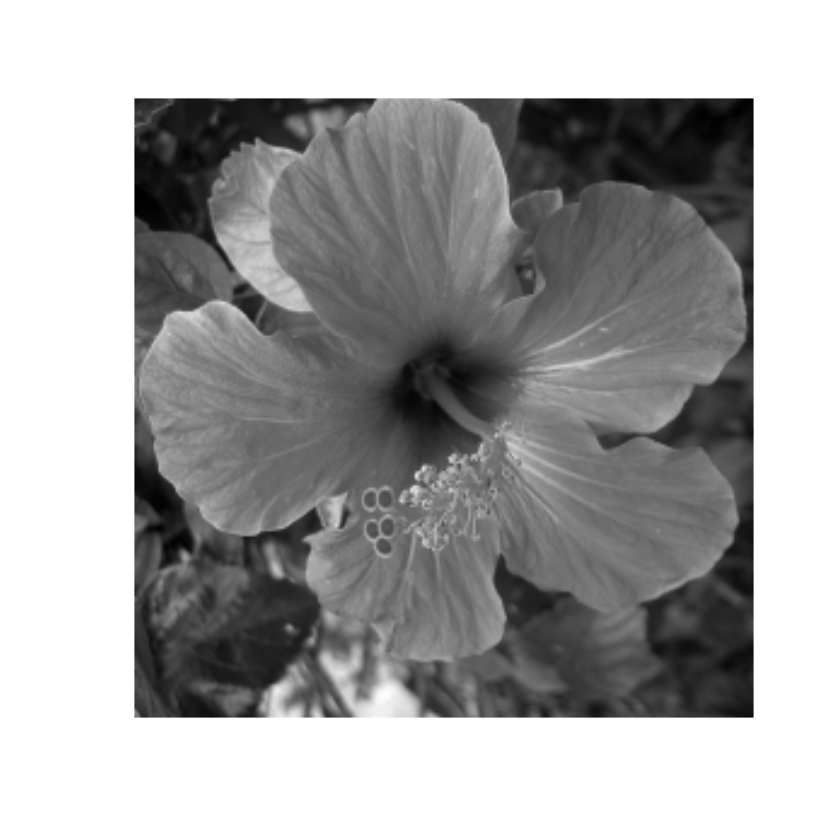

In [6]:
imageplot(clamp(x0))

Add some noise to the original image, to obtain $y=x_{0}+w$.

In [7]:
sigma = 0.1
y = x0 + randn(n,n) * sigma

Display the noisy image $y$.

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

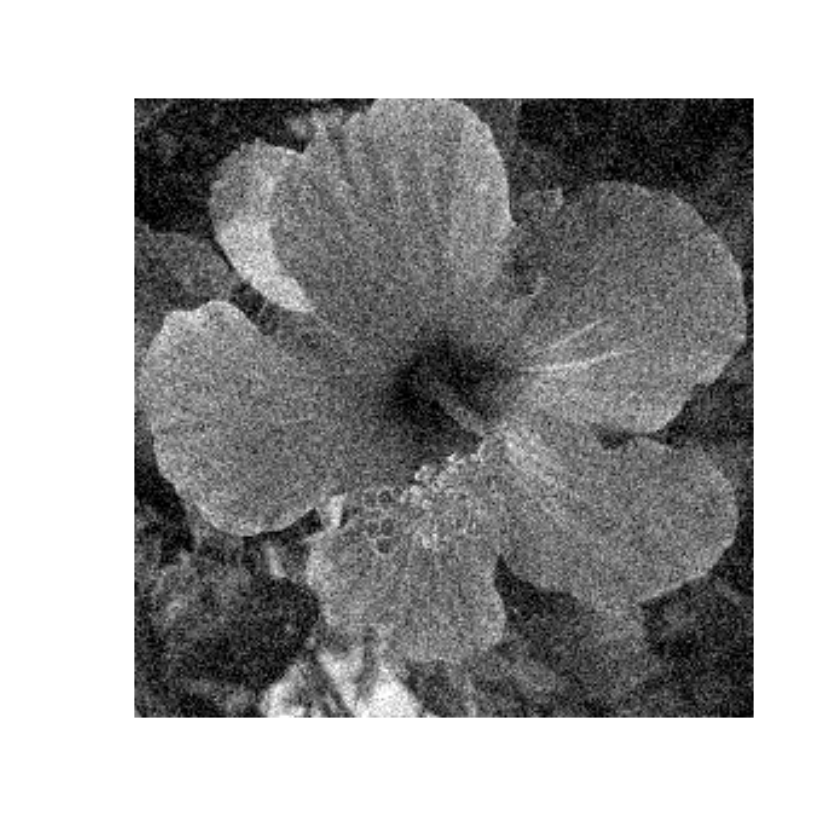

In [8]:
imageplot(clamp(y))

Set the regularization parameter $\la$.

In [9]:
lambda = 0.2

Chambolle Dual Algorithm 
-------------------------
We consider here the application of FB on the dual of the ROF problem, as
initially proposed in:


Antonin Chambolle,
_An Algorithm for Total Variation Minimization and Applications_,
Journal of Mathematical Imaging and Vision, 20(1-2), 2004.


An earlier version of this algorithm was proposed in:


B. Mercier,
_Inequations Variationnelles de la Mecanique_
Publications Mathematiques d'Orsay,
no. 80.01. Orsay, France, Universite de Paris-XI, 1980.


For a description of a more general framework, see:


P. L. Combettes, Dinh Dung, and B. C. Vu,
_Dualization of signal recovery problems_,
Set-Valued and Variational Analysis, vol. 18, pp. 373-404,
December 2010


The primal problem corresponds to minimizing $E(x) = f(x)+g(A(x))$ where
$$ f(x) = \frac{1}{2}\norm{x-y}^2
      \qandq
  g(u) = \la \norm{u}_{1,2}. $$

In [10]:
f = function(x){0.5 * norm(x-y)^2}
g = function(x){lambda * J(x)}
E = function(x){f(x) + g(x)}

The dual problem corresponds to minimzing $F(u)+ G(u)$
where
$$ F(u) = \frac{1}{2} \norm{y - A^* u}^2 - \frac{1}{2}\norm{y}^2
      \qandq
   G(u) = \iota_{\Cc}(u)
      \qwhereq \Cc = \enscond{u}{\norm{u}_{\infty,2} \leq \la}. $$
where
$$ \norm{u}_{\infty,2} = \umax{i,j} \norm{u_{i,j}}  $$

In [11]:
F = function(u){0.5 * norm(y - As(u))^2 - 0.5 * norm(y)^2}

One can thus solves the ROF problem by computing
$$ x^\star = y - A^* u^\star $$
where
$$ u^\star  \in \uargmin{ \norm{u}_{1,2} \leq \la } \norm{y - A^* u}  $$


One can compute explicitely the gradient of $F$:
$$ \nabla F(u) =  A (A^* u - y). $$

In [12]:
nablaF = function(u){A(As(u) - y)}

The proximal operator of $ G $ is the orthogonal projection on
$\Cc$, which is obtained as
$$ \text{prox}_{\ga G}(u)_{i,j} = \frac{u_{i,j}}{ \max(1,\norm{u_{i,j}}/\lambda) }. $$
Note that it does not depends on $\ga$.

In [13]:
d = function(u)
{
    n = dim(u)[1]
    p = dim(u)[2]

    out = array(0, c(n, p, 2))
    
    for (i in 1:n)
    {
        for (j in 1:p)
        {
            out[i, j,] = norm(u[i, j,])
        }
    }
    return (out)
}

proxG = function(u){u / pmax(d(u) / lambda, 1)}

The gradient step size of the FB should satisfy
$$ \ga < \frac{2}{\norm{A^* A}} = \frac{1}{4}. $$

In [14]:
gamma = 1./5

Initialize the FB with $u=0 \in \RR^P$.

In [15]:
u = array(0, c(n, n, 2))

One step of FB.

In [16]:
u = proxG(u - gamma * nablaF(u))

Update the solution using
$$ x^{(\ell)} = y - A^* u. $$

In [17]:
x = y - As(u)

__Exercise 1__

Perform Chambolle algorithm to solve the ROF problem.
Monitor the primal $E$ and dual $-F$ energies.

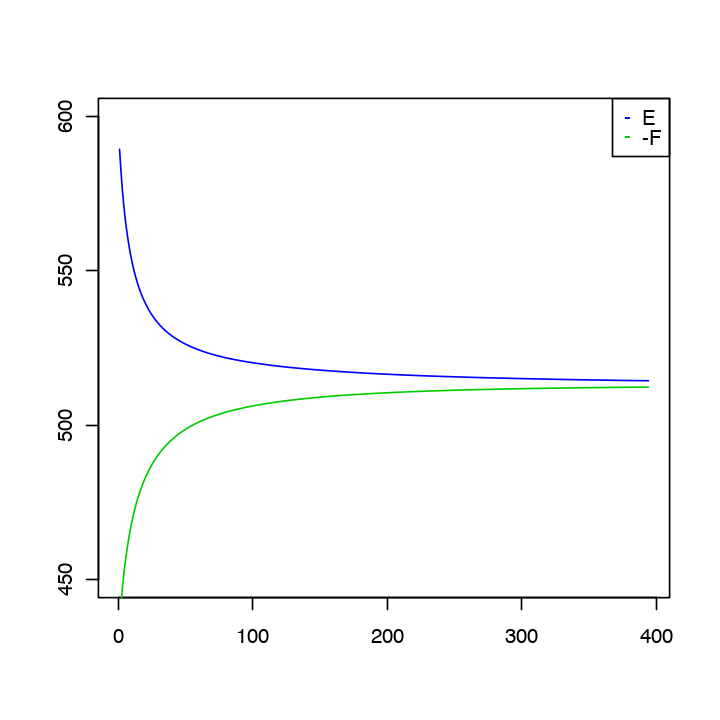

In [18]:
niter = 400
Elist = rep(0, niter)
Flist = rep(0, niter)

for (i in 1:niter)
{
    u = proxG(u - gamma * nablaF(u))
    x = y - As(u)
    Elist[i] = E(x)
    Flist[i] = F(u)
}
    
options(repr.plot.width=6, repr.plot.height=6)

plot(Elist[7:niter], type="l", ylim=c(450,600), col=4, xlab="", ylab="")
lines(-Flist[7:niter], col=3)

legend("topright", legend=c("E", "-F"), col=c(4,3), pch="-")

Display the denoised image $x^\star$.

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

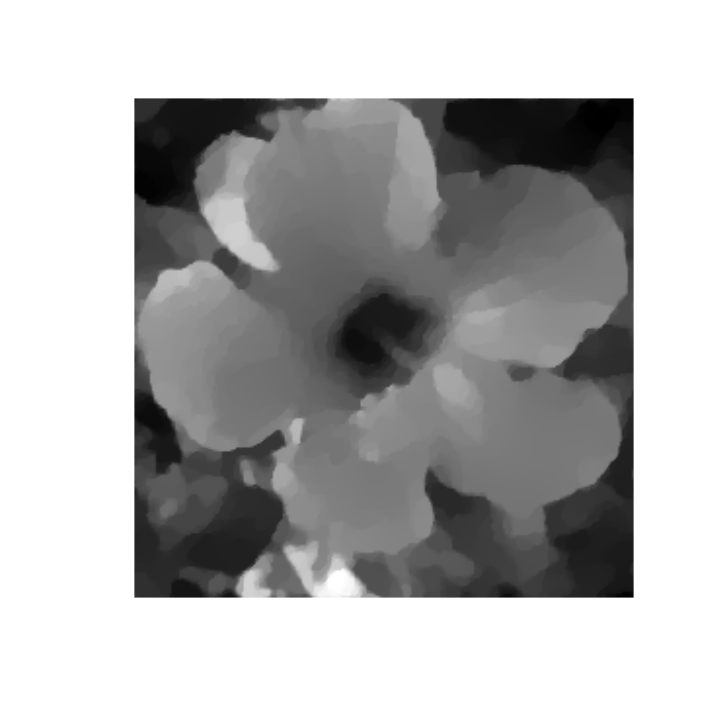

In [19]:
imageplot(clamp(x))